In [2]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from samplers import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

## QNN

In [10]:
backend = Aer.get_backend('qasm_simulator')

In [13]:
n = 30
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)
print(y.shape)

(30, 1)


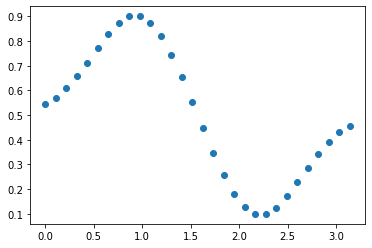

In [14]:
plt.plot(x, y, 'o')
plt.show()

In [ ]:
np.random.seed(42)

qnn = sequential_qnn(q_bits = [1, 3, 3],
                     dim = [1, 3, 3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

qnn.train(x, y, epochs=200, verbose=True)
    

saver(qnn, data_path("qnn_deriv"))

  0%|          | 0/200 [00:00<?, ?it/s]

epoch: 0, loss: 0.17672146761023172
epoch: 1, loss: 0.06938098919256903
epoch: 2, loss: 0.050141437807971444
epoch: 3, loss: 0.053972714413556624
epoch: 4, loss: 0.01952988390746043
epoch: 5, loss: 0.018243401774145553
epoch: 6, loss: 0.023083998329624697
epoch: 7, loss: 0.027209086545243892
epoch: 8, loss: 0.031141632990104882
epoch: 9, loss: 0.02792195344379581
epoch: 10, loss: 0.02617737847762187
epoch: 11, loss: 0.023861127063467307
epoch: 12, loss: 0.02615915771891558
epoch: 13, loss: 0.02529865236486449
epoch: 14, loss: 0.024195200708715038
epoch: 15, loss: 0.017031110351854527
epoch: 16, loss: 0.016120746438913366
epoch: 17, loss: 0.016115374028172015
epoch: 18, loss: 0.011758683518591063
epoch: 19, loss: 0.008957433810418238
epoch: 20, loss: 0.006775527551457356
epoch: 21, loss: 0.006681032062717192
epoch: 22, loss: 0.006724478588039636
epoch: 23, loss: 0.0059348265781449605
epoch: 24, loss: 0.0051540444062545135
epoch: 25, loss: 0.004623019687151169
